<h1><font color='blue'>Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
import glob
from PIL import Image

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

<h1><font color='blue'>Preparing The Data

In [3]:
No_Data_Path = Path("no")
Yes_Data_Path = Path("yes")
Pred_Data_Path = Path("pred")

No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))
Test_JPG_Path = list(Pred_Data_Path.glob(r"*.jpg"))

<h1><font color='blue'>Read in CSV file & Create Train-Test Data Frame

In [8]:
data = []

for No_JPG in No_JPG_Path:
    data.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    data.append(Yes_JPG)
    
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],data))
print(Labels[1400:1600])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 

In [9]:
JPG_Path = pd.DataFrame({'image': data}).astype(str)
JPG_Category = pd.DataFrame({'state': Labels})
df = pd.concat([JPG_Path, JPG_Category],axis=1)
df.head()

,image,state
0,no\no0.jpg,no
1,no\no1.jpg,no
2,no\no10.jpg,no
3,no\no100.jpg,no
4,no\no1000.jpg,no


In [10]:
Test_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))
print(Test_Labels[0:10])

['pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred', 'pred']


In [11]:
df_Test_JPG_Path = pd.DataFrame({'image': Test_JPG_Path}).astype(str)
df_Test_JPG_Category = pd.DataFrame({'state': Test_Labels})
test_df = pd.concat([df_Test_JPG_Path, df_Test_JPG_Category], axis=1)
test_df.head()

,image,state
0,pred\pred0.jpg,pred
1,pred\pred1.jpg,pred
2,pred\pred10.jpg,pred
3,pred\pred11.jpg,pred
4,pred\pred12.jpg,pred


In [12]:
df.shape

(3000, 2)

<h1><font color='blue'> Visualization

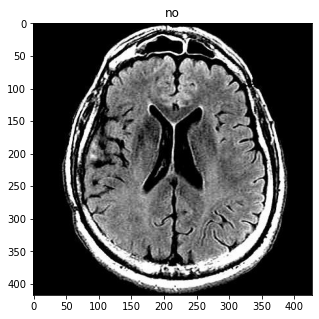

In [13]:
fig = plt.figure(figsize=(5,5))
fig = plt.imread(df['image'][350])
plt.title(df['state'][350])
plt.imshow(fig)

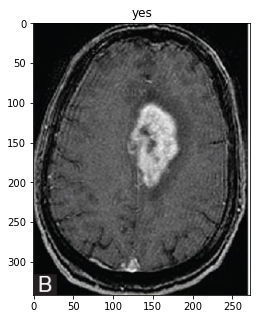

In [14]:
fig = plt.figure(figsize=(5,5))
fig = plt.imread(df['image'][2020])
plt.title(df['state'][2020])
plt.imshow(fig)

<h1><font color='blue'>Spl

In [95]:
x_train, x_test = train_test_split(df, train_size=0.8, random_state=2)

In [96]:
x_train.shape

(2400, 2)

In [97]:
x_test.shape

(600, 2)

<h1><font color='blue'>Create Train & Test Generators

In [120]:
generator = ImageDataGenerator(rescale=1./255)

In [121]:
train = generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='state', target_size=(200,200), color_mode='grayscale', class_mode='categorical')

Found 2400 validated image filenames belonging to 2 classes.


In [122]:
test = generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='state', target_size=(200,200), color_mode='grayscale', class_mode='categorical')

Found 600 validated image filenames belonging to 2 classes.


In [123]:
print(train.class_indices)
print(train.image_shape)

{'no': 0, 'yes': 1}
(200, 200, 1)


In [124]:
print(test.class_indices)
print(test.image_shape)

{'no': 0, 'yes': 1}
(200, 200, 1)


<h1><font color='blue'> CNN Model

In [149]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(200,200,1)),
    layers.MaxPooling2D((2, 2)), layers.Dropout((0.2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), layers.Dropout((0.2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), layers.Dropout((0.2)),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), layers.Dropout((0.2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [150]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True
)


In [152]:
cnn_model = cnn.fit(train, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
75/75 [==============================] - 139s 2s/step - loss: 0.5003 - accuracy: 0.7596
Epoch 2/1000
75/75 [==============================] - 144s 2s/step - loss: 0.3885 - accuracy: 0.8333
Epoch 3/1000
75/75 [==============================] - 146s 2s/step - loss: 0.2791 - accuracy: 0.8892
Epoch 4/1000
75/75 [==============================] - 146s 2s/step - loss: 0.2065 - accuracy: 0.9196
Epoch 5/1000
75/75 [==============================] - 146s 2s/step - loss: 0.1697 - accuracy: 0.9325
Epoch 6/1000
75/75 [==============================] - 147s 2s/step - loss: 0.1172 - accuracy: 0.9563
Epoch 7/1000
75/75 [==============================] - 147s 2s/step - loss: 0.0985 - accuracy: 0.9667
Epoch 8/1000
75/75 [==============================] - 147s 2s/step - loss: 0.0805 - accuracy: 0.9704
Epoch 9/1000
75/75 [==============================] - 153s 2s/step - loss: 0.0492 - accuracy: 0.9800
Epoch 10/1000
75/75 [==============================] - 149s 2s/step - loss: 0.0614 - accura

In [153]:
cnn.evaluate(test)

19/19 [==============================] - 8s 426ms/step - loss: 0.0989 - accuracy: 0.9750


[0.09891991317272186, 0.9750000238418579]

<h1><font color='blue'> Make Predictions on Test Set

In [188]:
test_df1 = test_df.drop('state', axis=1)
test_df1.head()

,image
0,pred\pred0.jpg
1,pred\pred1.jpg
2,pred\pred10.jpg
3,pred\pred11.jpg
4,pred\pred12.jpg


In [209]:
test_generator = ImageDataGenerator(rescale=1./255)

In [210]:
test_data = test_generator.flow_from_dataframe(dataframe=test_df1,
                                                       x_col="image",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [211]:
predictions = cnn.predict(test_data)

In [212]:
predictions = predictions.argmax(axis=-1)
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [216]:
Last_Prediction = []
[Last_Prediction.append('healthy') if i == 0 else Last_Prediction.append('diseased') for i in predictions]
print(Last_Prediction)

['healthy', 'healthy', 'diseased', 'diseased', 'healthy', 'healthy', 'diseased', 'healthy', 'healthy', 'diseased', 'healthy', 'diseased', 'diseased', 'diseased', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'diseased', 'diseased', 'diseased', 'healthy', 'healthy', 'healthy', 'diseased', 'diseased', 'diseased', 'healthy', 'healthy', 'diseased', 'healthy', 'diseased', 'diseased', 'healthy', 'healthy', 'diseased', 'diseased', 'healthy', 'healthy', 'diseased', 'healthy', 'diseased', 'diseased', 'diseased', 'healthy', 'healthy', 'healthy', 'healthy', 'diseased', 'healthy', 'diseased', 'healthy', 'healthy', 'diseased']


<h1><font color='blue'> Save The Model

In [217]:
cnn.save("cnn model/")

INFO:tensorflow:Assets written to: cnn model/assets
